In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [23]:
data = pd.read_csv('train_cleaned.csv')

In [24]:
x = data.loc[:,'2ndFlrSF_log':'SaleType_WD']
y = data.loc[:,'SalePrice_log':'SalePrice_log']

In [25]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [26]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 4))
    return(rmse)

# Ridge

In [6]:
#alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, ]
alphas = np.linspace(0.1,20,200)
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0,0.5,'RMSE')

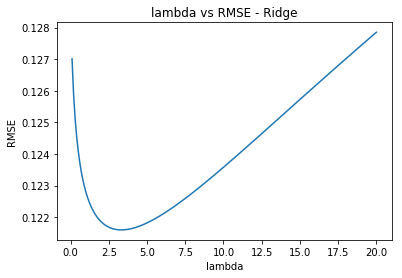

In [7]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "lambda vs RMSE - Ridge")
plt.xlabel("lambda")
plt.ylabel("RMSE")

In [70]:
alphas = np.linspace(3.01,4,200)
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0,0.5,'rmse')

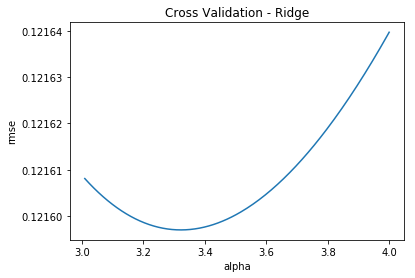

In [71]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Cross Validation - Ridge")
plt.xlabel("alpha")
plt.ylabel("rmse")

# Lasso

In [8]:
from sklearn.linear_model import Lasso

Text(0,0.5,'RMSE')

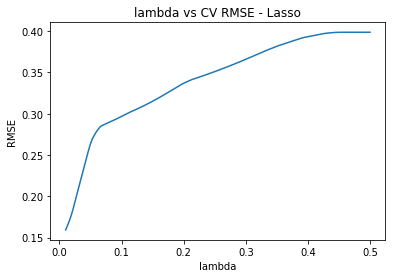

In [9]:
alphas = np.linspace(0.01,0.5,500)
cv_ridge = [rmse_cv(Lasso(alpha = alpha)).mean() 
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "lambda vs CV RMSE - Lasso")
plt.xlabel("lambda")
plt.ylabel("RMSE")

In [8]:
lasso_train = Lasso(alpha=0.005).fit(x, y)

In [11]:
np.count_nonzero(lasso_train.coef_)

31

Text(0,0.5,'feature_num')

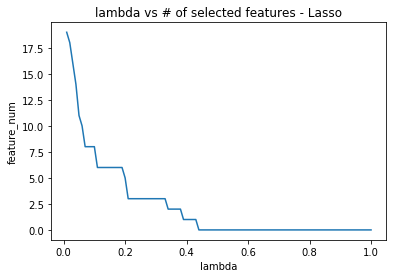

In [10]:
alphas = np.linspace(0.01,1,100)
feature_num = [np.count_nonzero(Lasso(alpha=alpha).fit(x, y).coef_) for alpha in alphas]
feature_num = pd.Series(feature_num, index = alphas)
feature_num.plot(title = "lambda vs # of selected features - Lasso")
plt.xlabel("lambda")
plt.ylabel("feature_num")

Text(0,0.5,'feature_num')

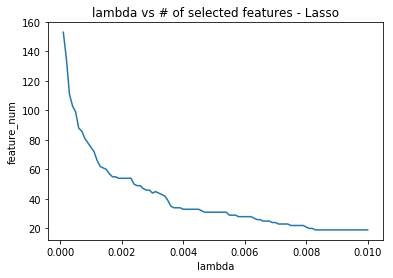

In [11]:
alphas = np.linspace(0.0001,0.01,100)
feature_num = [np.count_nonzero(Lasso(alpha=alpha).fit(x, y).coef_) for alpha in alphas]
feature_num = pd.Series(feature_num, index = alphas)
feature_num.plot(title = "lambda vs # of selected features - Lasso")
plt.xlabel("lambda")
plt.ylabel("feature_num")

Text(0,0.5,'feature_num')

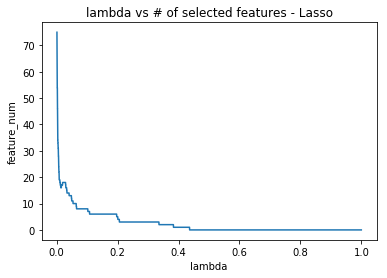

In [12]:
alphas = np.linspace(0.001,1,10000)
feature_num = [np.count_nonzero(Lasso(alpha=alpha).fit(x, y).coef_) for alpha in alphas]
feature_num = pd.Series(feature_num, index = alphas)
feature_num.plot(title = "lambda vs # of selected features - Lasso")
plt.xlabel("lambda")
plt.ylabel("feature_num")

# Random Forest Regression

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [102]:
rmse_cv(RandomForestRegressor(max_depth = 200))

array([0.13738792, 0.16340201, 0.1560206 , 0.13956248, 0.14352743])

Text(0,0.5,'RMSE')

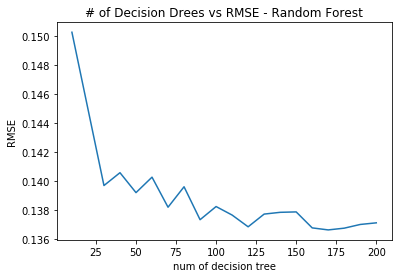

In [31]:
#reg = RandomForestRegressor(n_estimators=100, max_depth=50)

#alphas = np.linspace(5,200,40)
#alphas = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]
alphas = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
cv_ridge = [rmse_cv(RandomForestRegressor(n_estimators = alpha)).mean() for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "# of Decision Drees vs RMSE - Random Forest")
plt.xlabel("num of decision tree")
plt.ylabel("RMSE")

Text(0,0.5,'RMSE')

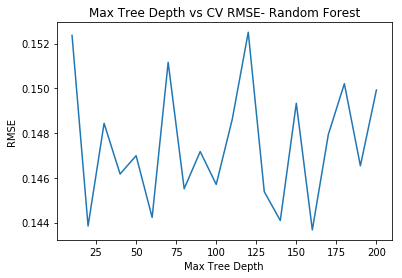

In [19]:
#reg = RandomForestRegressor(n_estimators=100, max_depth=50)

#alphas = np.linspace(5,200,40)
alphas = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]

cv_ridge = [rmse_cv(RandomForestRegressor(max_depth = alpha)).mean() for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Max Tree Depth vs CV RMSE- Random Forest")
plt.xlabel("Max Tree Depth")
plt.ylabel("RMSE")

# SVR

In [116]:
from sklearn.svm import SVR

Text(0,0.5,'rmse')

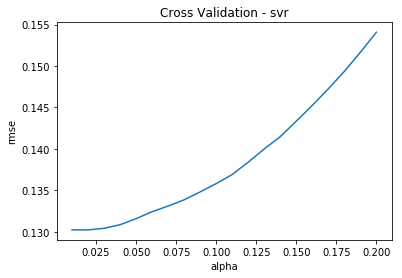

In [118]:
#alphas = np.linspace(5,200,40)
alphas = np.linspace(0.01,0.2,20)

cv_ridge = [rmse_cv(SVR(epsilon = alpha)).mean() for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Cross Validation - svr")
plt.xlabel("alpha")
plt.ylabel("rmse")

# Elastic Net

In [31]:
from sklearn.linear_model import ElasticNet

In [37]:
a = [0, 0.001, 0.0023, 0.005, 0.0075, 0.01, 0.05, 0.1, 0.25, 0.5]
b = [0, 0.1, 0.2, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]
#b = [0.1, 0.2, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]

In [39]:
best_a = 0
best_b = 0
best_score = 100
for i in a:
    for j in b:
        if i == 0 and j == 0:
            break
        else:
            alpha_ = i + j
            l1_ratio_ = i/(i+j)
            score = rmse_cv(ElasticNet(alpha = alpha_, l1_ratio = l1_ratio_)).mean() 
        #print('a:', i, 'b:', j, 'score:', round(score,4))
            if score < best_score:
                best_score = score
                best_a = i
                best_b = j
print('best_a:', best_a, 'best_b:', best_b, 'best_score:', best_score)

best_a: 0.001 best_b: 0 best_score: 0.123477265364898


In [40]:
rmse_cv(ElasticNet(alpha = 0, l1_ratio = 0)).mean() 

0.12899168992036314

Text(0,0.5,'rmse')

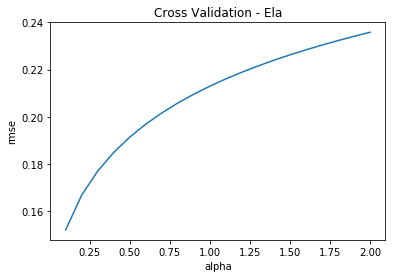

In [45]:
alphas = np.linspace(0.1,2,20)
cv_ridge = [rmse_cv(ElasticNet(alpha = alpha, l1_ratio = 0)).mean() 
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Cross Validation - Ela")
plt.xlabel("alpha")
plt.ylabel("rmse")